## Project - Applying Data Science Methodology on Red Wine Quality Dataset

<img src="https://media.giphy.com/media/jRuv9xc10lVyE/giphy.gif">

You can read more about the Data Science Methodology from this [IBM whitepaper](https://tdwi.org/~/media/64511A895D86457E964174EDC5C4C7B1.PDF) by John Rollins

[Link](https://archive.ics.uci.edu/ml/datasets/wine+quality) for the dataset for context

<img src="https://media-exp1.licdn.com/dms/image/C4D12AQGOPVf5iqhhwQ/article-inline_image-shrink_1000_1488/0/1597756152693?e=1652918400&v=beta&t=iKZ2jX3khsx11lD9JyZWDz-j-Gt2hZsKPXz5rZ0iE1M">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. 

The goal is to implement Regression Models and Classification Models on the Red Wine Quality Dataset to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach
Based on the above business understanding one should decide the analytical approach to follow. The approaches can be of 4 types: Descriptive approach (current status and information provided), Diagnostic approach(a.k.a statistical analysis, what is happening and why it is happening), Predictive approach(it forecasts on the trends or future events probability) and Prescriptive approach( how the problem should be solved actually).

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

*TODO*

The analytic approach used for this project is predictive approach. The reason is that in this project, historical data has been fed into ML models, and we are trying to find patterns in data (or statiscally significant predictors) to predict wine quality using results from physiochemical tests in the future.

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

*TODO*

Usually, the brand, the location where the grapes were grown, climate of the production year, age of the wine, and the method as well as microenvironment of fermenting, etc. can provide a good indication of quality of the red wine. But if we go to a layer deeper, the reason why those factors are good indicators is because they affect the concentration of certain chemicals which can determines the taste and texture of the wine. A certain combination of concentrations of certain chemicals will stimulate human taste buds in a special way, thus provide the basis for the quality assessment performed by professional tasters. So by carrying out physiochemical tests of different red wine samples and comparing with the quality ratings given by professional wine tasters, we can determine which features provide significant prediction power on the quality of the wine. 



### Data Collection

**Q3. From where do we get our data?**

We get data by reading from the winequality-red.csv file. 

We get our data by collecting different Vinho Verde red wine samples from different producers/brands and performing physiochemical tests on those samples. The results from the physiochemical tests, as well as the quality rating given by professional wine tasters are recorded. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np
import seaborn as sb
%matplotlib inline

wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


To make future job easier, I renamed the columns to make them one word only.

In [2]:
wine = wine.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid',
                         'residual sugar': 'residual_sugar', 'free sulfur dioxide': 'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'})
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

*TODO*

The samples are obtained from the north of Portugal

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

*TODO*

By understanding the impact of each individual varible on the red wine quality (in this project, the 'Vinho Verde' red wine specifically), the producers can be laser focused on how they can improve the quality of the product by focusing on ways to adjust the levels of those chemicals that matter the most, through the whole process from what kind of nuetrients to feed the grapes, to in what microenvironment settings to carry out the fermenting process, etc. The clearer focus can help producers to improve their process and product quality in the most economical and efficient way. Distributors can improve their testing and selecting processes by focusing on tests on concentration level of certain chemicals, instead of solely depending on experience and the feedback from professional tasters. This not only can help them save costs, but also provides them with a more unbiased way to assess the quality of the wine. 



*TODO*
<li>Check the shape of data, and the datatypes of the features</li>
<li>Understand the data by carrying out any steps that you think are necessary</li>

#### Check the shape of data, and the datatypes of the features

In [3]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From this table, it can be seen that there are some extreme values in min and max, indicating the existence of outliers. will take a closer look at the next step.

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


This shows the data type of our features

#### Understand the data by carrying out any steps that you think are necessary

In [5]:
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

The data is not that balanced, with larger size for medium rating wines and smaller size for low or high quality wines. but it is ok, because the imbalance is not extreme. Therefore nothing needs to be done.

In [6]:
wine.groupby('quality').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


Just by looking at the data, a rough observation is that 'volatile acidity' level increases as the quality increases, and 'chlorides' level decreases as quality increases, and 'sophates' level increases as quality increases. The rest does not show much variation as quality changes. But again this is only premilinary, more investigation is needed. 

In [7]:
wine.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


### Data Preparation

#### Explore the dataset further
*TODO*
<li>Check for missing values and handle if any</li>
<li>Check for outliers if any and handle them</li>
<li>Implement Correlation heatmap</li>
<li>Check the distribution of data using histograms</li>
<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

#### Check for missing values and handle if any

In [8]:
wine.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Confirmed that there are no missing values.

#### Check for outliers if any and handle them

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

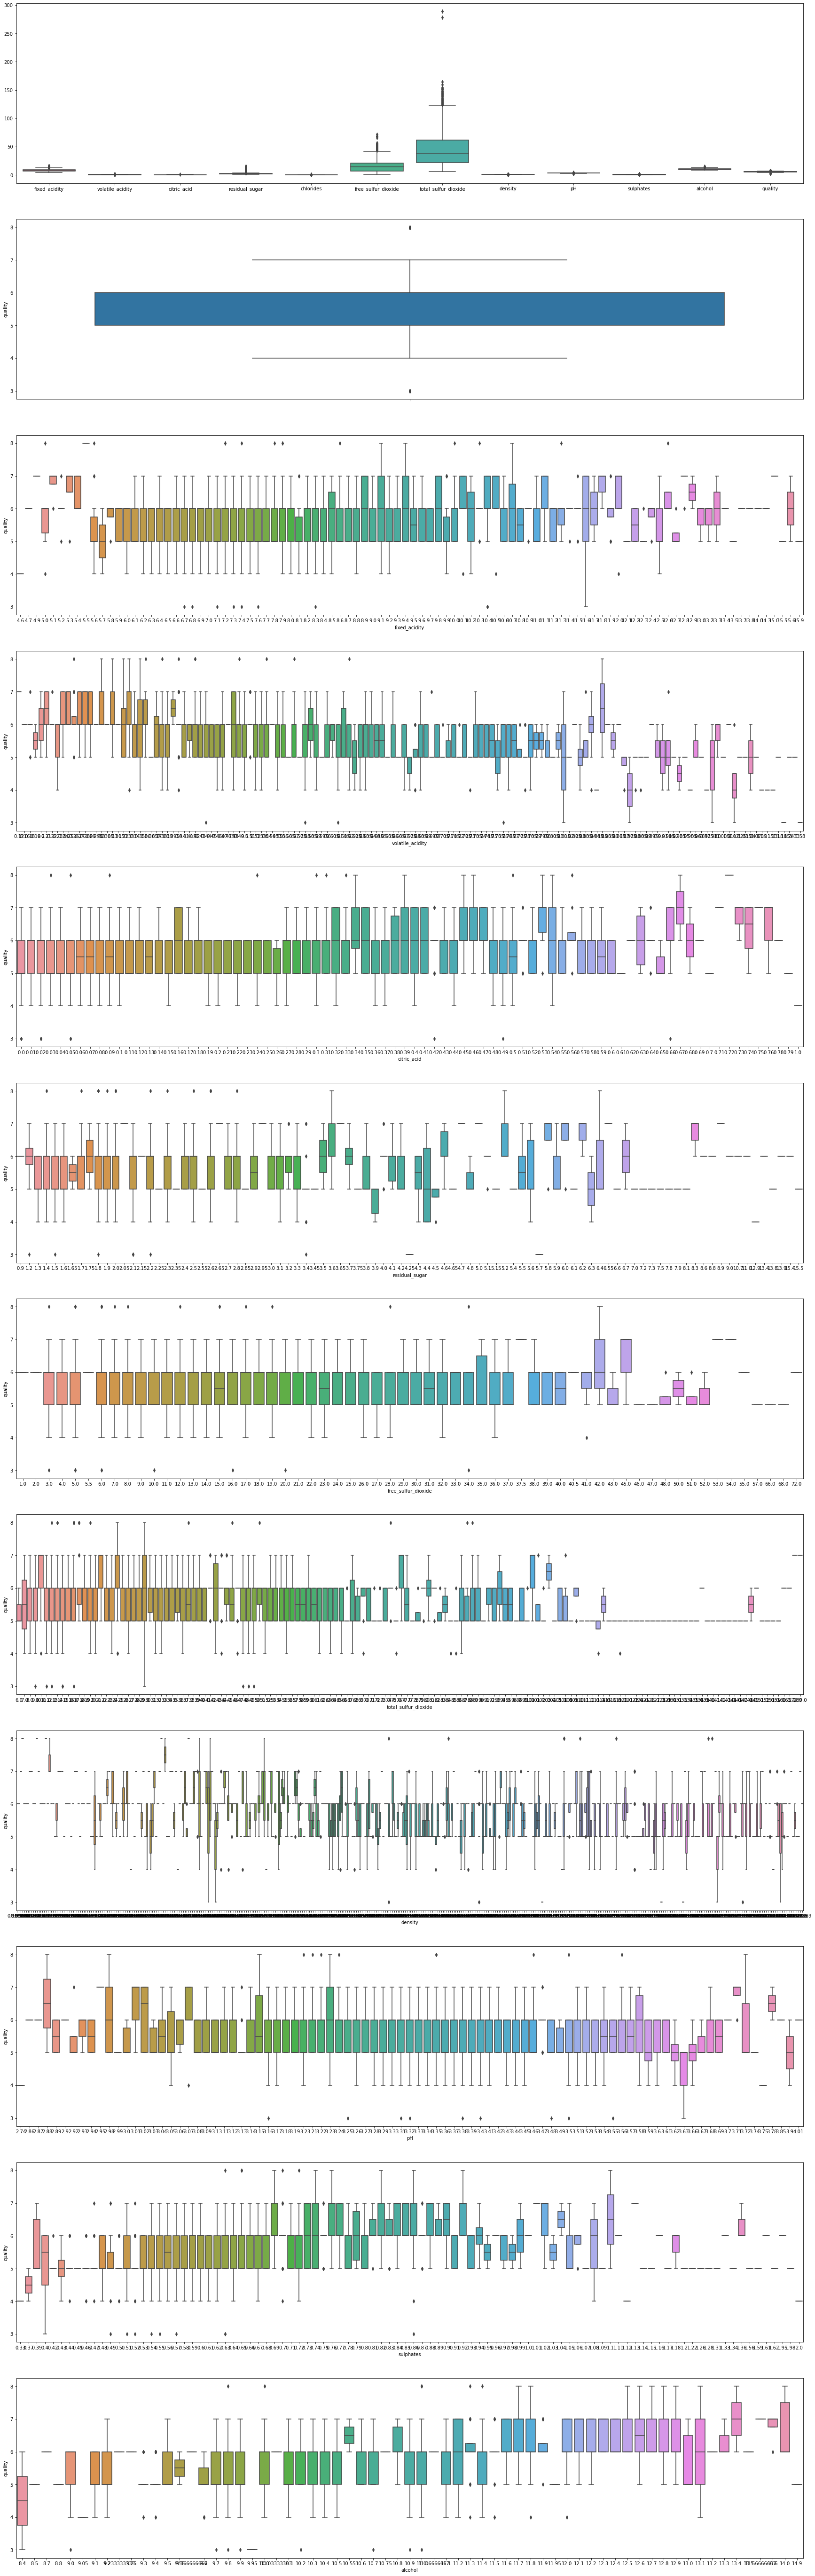

In [9]:
fig, axes = plt.subplots(nrows=12,ncols=1)
fig.set_size_inches(30, 100)
sn.boxplot(data=wine,orient="v",ax=axes[0])
sn.boxplot(data=wine,y="quality",orient="v",ax=axes[1])
sn.boxplot(data=wine,y="quality",x="fixed_acidity",orient="v",ax=axes[2])
sn.boxplot(data=wine,y="quality",x="volatile_acidity",orient="v",ax=axes[3])
sn.boxplot(data=wine,y="quality",x="citric_acid",orient="v",ax=axes[4])
sn.boxplot(data=wine,y="quality",x="residual_sugar",orient="v",ax=axes[5])
sn.boxplot(data=wine,y="quality",x="free_sulfur_dioxide",orient="v",ax=axes[6])
sn.boxplot(data=wine,y="quality",x="total_sulfur_dioxide",orient="v",ax=axes[7])
sn.boxplot(data=wine,y="quality",x="density",orient="v",ax=axes[8])
sn.boxplot(data=wine,y="quality",x="pH",orient="v",ax=axes[9])
sn.boxplot(data=wine,y="quality",x="sulphates",orient="v",ax=axes[10])
sn.boxplot(data=wine,y="quality",x="alcohol",orient="v",ax=axes[11])


In [10]:
def detect_outlier(feature):
    outliers = []
    data = wine[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(y)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                           len([i for i in data
                                                                if i > data.quantile(.99)])))

In [11]:
for feat in ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']:
    detect_outlier(feat)


Outlier caps for fixed_acidity:
  --95p: 11.8 / 78 values exceed that
  --3sd: 13.5 / 12 values exceed that
  --99p: 13.3 / 14 values exceed that

Outlier caps for volatile_acidity:
  --95p: 0.8 / 76 values exceed that
  --3sd: 1.1 / 10 values exceed that
  --99p: 1.0 / 15 values exceed that

Outlier caps for citric_acid:
  --95p: 0.6 / 78 values exceed that
  --3sd: 0.9 / 1 values exceed that
  --99p: 0.7 / 16 values exceed that

Outlier caps for residual_sugar:
  --95p: 5.1 / 79 values exceed that
  --3sd: 6.8 / 30 values exceed that
  --99p: 8.3 / 16 values exceed that

Outlier caps for chlorides:
  --95p: 0.1 / 80 values exceed that
  --3sd: 0.2 / 31 values exceed that
  --99p: 0.4 / 16 values exceed that

Outlier caps for free_sulfur_dioxide:
  --95p: 35.0 / 77 values exceed that
  --3sd: 47.2 / 22 values exceed that
  --99p: 50.0 / 16 values exceed that

Outlier caps for total_sulfur_dioxide:
  --95p: 112.1 / 80 values exceed that
  --3sd: 145.1 / 15 values exceed that
  --99p: 

I decided to cap data at 99% threshold. That affects roughly 10-20 data points across all features, consistent, and not too many (out of ~1600 records)

In [12]:
# Cap features
wine['residual_sugar'] = wine['residual_sugar'].clip(upper=wine['residual_sugar'].quantile(.99))
wine['total_sulfur_dioxide'] = wine['total_sulfur_dioxide'].clip(upper=wine['total_sulfur_dioxide'].quantile(.99))
wine['sulphates'] = wine['sulphates'].clip(upper=wine['sulphates'].quantile(.99))

In [13]:
# Describe the dataframe again to make sure the capping was successful
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.00000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.50253,0.087467,15.874922,46.239525,0.996747,3.311113,0.655201,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.17140,0.047065,10.460157,31.818151,0.001887,0.154386,0.153624,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.90000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.90000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.20000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.60000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,8.30600,0.611000,72.000000,145.000000,1.003690,4.010000,1.260400,14.900000,8.000000


After removing a few extreme values, the variation becomes much more moderate which makes sense. That is because though some variations are expected, it is highly unlikely to have extreme variations in concentration level in any kind of chemicals in the same type of wine. 

#### Implement Correlation heatmap

<AxesSubplot:>

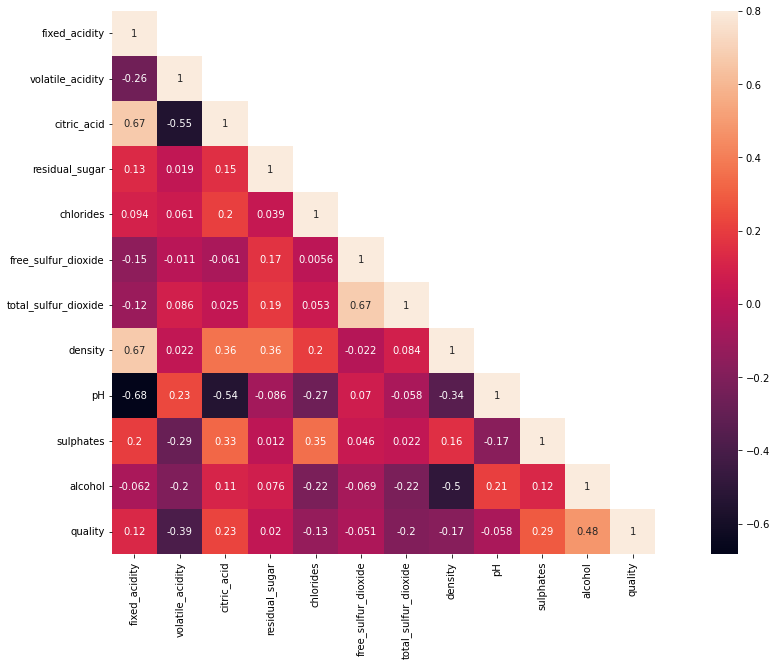

In [14]:
corrMatt = wine.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

The correlation heatmap shows that 'alcohol', 'volatile_acidity' stand out as having the strongest correlation with 'quality'. 

#### Check the distribution of data using histograms

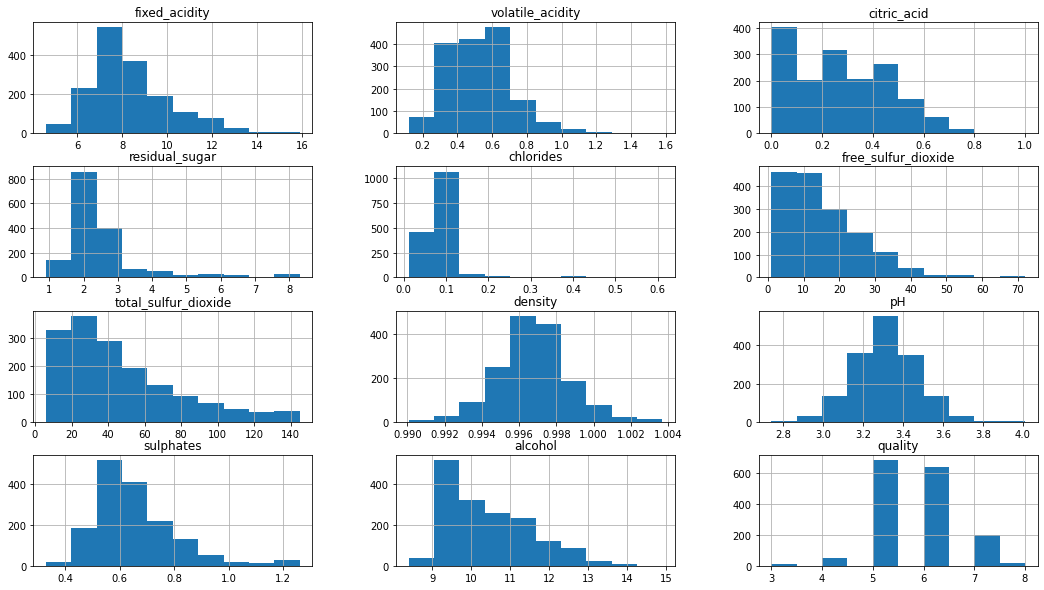

In [15]:
wine.hist(figsize=(18,10));

about half of the features display normal distributions while the other show higher density at the low end (However, the tails at the right side are not that long).

#### Prepare the data for modeling by carrying out any steps that you think are necessary

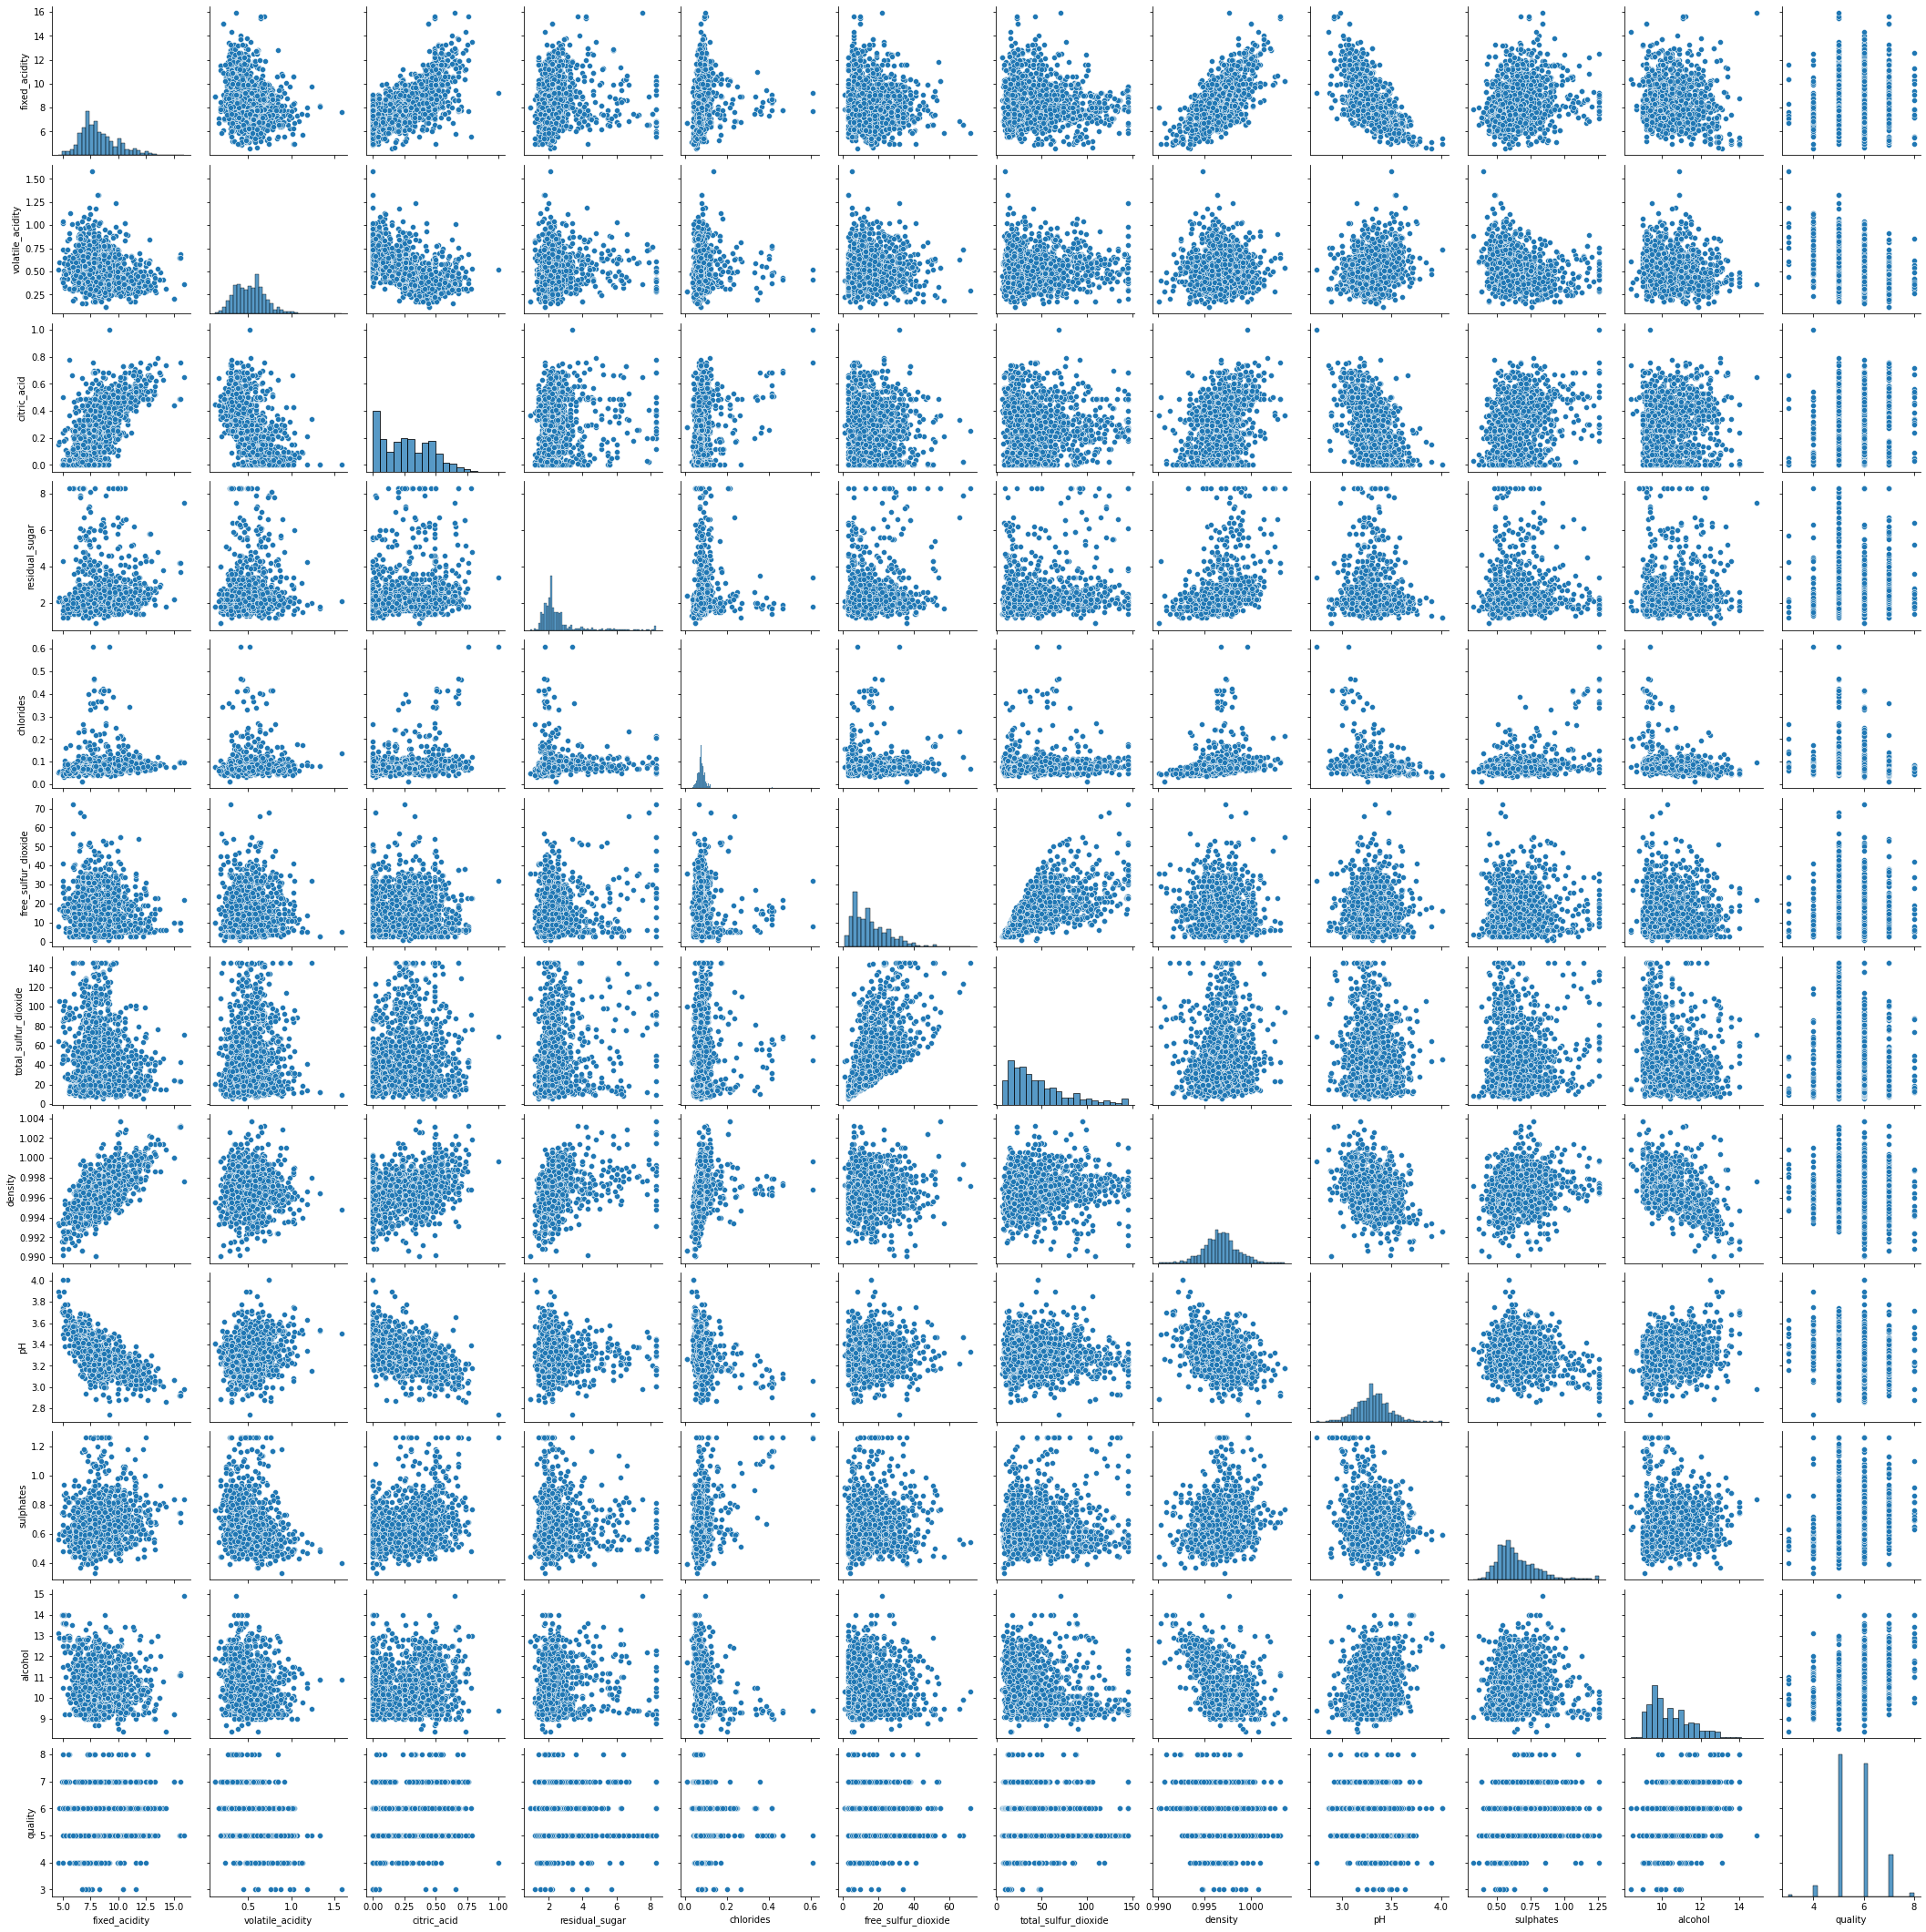

In [16]:
sb.pairplot(wine)

#### Normalization

Normalization is critical to both our multivariable regression and neural network modelling, especially when there is a diverse array of features, each with varying magnitudes. I decided to use MinMaxSacler to normalize the data. it scales data to the range from 0 - 1, which would also help format the data as input for the neural network modelling. 

In [17]:
from sklearn.preprocessing import MinMaxScaler
wine_scaled = MinMaxScaler().fit_transform(wine)
wine_scaled[:5]

array([[0.24778761, 0.39726027, 0.        , 0.13502565, 0.10684474,
        0.14084507, 0.20143885, 0.56754772, 0.60629921, 0.2472055 ,
        0.15384615, 0.4       ],
       [0.28318584, 0.52054795, 0.        , 0.22954361, 0.14357262,
        0.33802817, 0.43884892, 0.49412628, 0.36220472, 0.37618229,
        0.21538462, 0.4       ],
       [0.28318584, 0.43835616, 0.04      , 0.18903592, 0.13355593,
        0.1971831 , 0.34532374, 0.50881057, 0.40944882, 0.34393809,
        0.21538462, 0.4       ],
       [0.5840708 , 0.10958904, 0.56      , 0.13502565, 0.10517529,
        0.22535211, 0.38848921, 0.58223201, 0.33070866, 0.26870163,
        0.21538462, 0.6       ],
       [0.24778761, 0.39726027, 0.        , 0.13502565, 0.10684474,
        0.14084507, 0.20143885, 0.56754772, 0.60629921, 0.2472055 ,
        0.15384615, 0.4       ]])

In [18]:
pd.DataFrame(wine_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.216383,0.125988,0.209506,0.289493,0.490211,0.449695,0.349528,0.311228,0.527205
std,0.154079,0.122644,0.194801,0.158169,0.078573,0.147326,0.228908,0.138571,0.121564,0.165116,0.163949,0.161514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.135026,0.096828,0.084507,0.115108,0.406021,0.370079,0.236457,0.169231,0.400000
50%,0.292035,0.273973,0.260000,0.175533,0.111853,0.183099,0.230216,0.490455,0.448819,0.311694,0.276923,0.600000
75%,0.407080,0.356164,0.420000,0.229544,0.130217,0.281690,0.402878,0.570117,0.519685,0.429923,0.415385,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


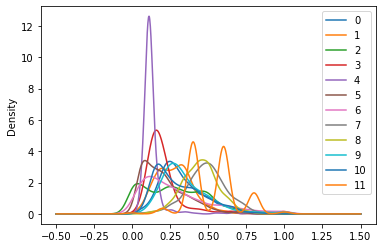

In [19]:
pd.DataFrame(wine_scaled).plot(kind='kde');

### Modeling

*TODO*
<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>
<li>Implement a Neural Network using Tensorflow and Keras to classify wine quality</li>

#### Split into train, validation, and test set

In [20]:
from sklearn.model_selection import train_test_split

features = wine.drop('quality', axis=1)
labels = wine['quality']

#step 1
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
#step 2
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [21]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


#### Hyperparameter Tuning

In [22]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [23]:
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestRegressor()

print(rf)

parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

rf_cv = GridSearchCV(rf, parameters, cv=5)
rf_cv.fit(X_train, y_train.values.ravel())
#? Bike example uses rfModel.fit(X_train,np.log1p(y_train))

print_results(rf_cv)

RandomForestRegressor()
BEST PARAMS: {'max_depth': None, 'n_estimators': 512}

0.29 (+/-0.122) for {'max_depth': 2, 'n_estimators': 8}
0.305 (+/-0.138) for {'max_depth': 2, 'n_estimators': 16}
0.3 (+/-0.13) for {'max_depth': 2, 'n_estimators': 32}
0.303 (+/-0.15) for {'max_depth': 2, 'n_estimators': 64}
0.303 (+/-0.15) for {'max_depth': 2, 'n_estimators': 128}
0.304 (+/-0.14) for {'max_depth': 2, 'n_estimators': 256}
0.302 (+/-0.146) for {'max_depth': 2, 'n_estimators': 512}
0.336 (+/-0.152) for {'max_depth': 4, 'n_estimators': 8}
0.357 (+/-0.154) for {'max_depth': 4, 'n_estimators': 16}
0.354 (+/-0.157) for {'max_depth': 4, 'n_estimators': 32}
0.356 (+/-0.148) for {'max_depth': 4, 'n_estimators': 64}
0.362 (+/-0.159) for {'max_depth': 4, 'n_estimators': 128}
0.357 (+/-0.151) for {'max_depth': 4, 'n_estimators': 256}
0.357 (+/-0.155) for {'max_depth': 4, 'n_estimators': 512}
0.308 (+/-0.217) for {'max_depth': 8, 'n_estimators': 8}
0.349 (+/-0.178) for {'max_depth': 8, 'n_estimators': 1

In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))

0.3727943415961853


In [25]:
joblib.dump(rf_cv.best_estimator_, 'RF_model.pkl')
joblib.dump(lr, 'LR_model.pkl')

['LR_model.pkl']

#### Implement a Neural Network using Tensorflow and Keras to classify wine quality

In [26]:
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

In [27]:
X_train_np = X_train.to_numpy()
X_val_np = X_val.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_val_np = y_val.to_numpy()
y_test_np = y_test.to_numpy()

Preprocess the dataset from df to np array to be used by the neural network model

In [28]:
X_train_np[0]

array([10.9   ,  0.53  ,  0.49  ,  4.6   ,  0.118 , 10.    , 17.    ,
        1.0002,  3.07  ,  0.56  , 11.7   ])

In [29]:
y_train_np[0]

6

In [30]:
n_classes = 11
y_train_np = to_categorical(y_train_np, n_classes)
y_val_np = to_categorical(y_val_np, n_classes)
y_test_np = to_categorical(y_test_np, n_classes)

In [31]:
y_train_np[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

##### Design neural network architecture

In [32]:
model = Sequential()
model.add(Dense(256, activation ='relu', input_shape =(11, )))
model.add(Dense(256, activation ='relu'))
model.add(Dense(11, activation='softmax'))
# last one has to be 'softmax'. And number of neuron has to = number of classes (classification problem)

2022-04-10 23:26:46.339111: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 11)                2827      
                                                                 
Total params: 71,691
Trainable params: 71,691
Non-trainable params: 0
_________________________________________________________________


##### Configure model

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

##### Train

In [35]:
history = model.fit(X_train_np, y_train_np, batch_size=128, epochs=200, verbose=1, validation_data=(X_val_np, y_val_np))

Epoch 1/200
8/8 [==============================] - 0s 21ms/step - loss: 2.7631 - accuracy: 0.3577 - val_loss: 1.3735 - val_accuracy: 0.4656
Epoch 2/200
8/8 [==============================] - 0s 4ms/step - loss: 1.3564 - accuracy: 0.4265 - val_loss: 1.3462 - val_accuracy: 0.4969
Epoch 3/200
8/8 [==============================] - 0s 4ms/step - loss: 1.2597 - accuracy: 0.4870 - val_loss: 1.2457 - val_accuracy: 0.4500
Epoch 4/200
8/8 [==============================] - 0s 4ms/step - loss: 1.2647 - accuracy: 0.4244 - val_loss: 1.2303 - val_accuracy: 0.4469
Epoch 5/200
8/8 [==============================] - 0s 4ms/step - loss: 1.1880 - accuracy: 0.5016 - val_loss: 1.2098 - val_accuracy: 0.4812
Epoch 6/200
8/8 [==============================] - 0s 4ms/step - loss: 1.1625 - accuracy: 0.4974 - val_loss: 1.1881 - val_accuracy: 0.4781
Epoch 7/200
8/8 [==============================] - 0s 4ms/step - loss: 1.1310 - accuracy: 0.5162 - val_loss: 1.1870 - val_accuracy: 0.4969
Epoch 8/200
8/8 [=========

8/8 [==============================] - 0s 4ms/step - loss: 0.9571 - accuracy: 0.5881 - val_loss: 1.1257 - val_accuracy: 0.5000
Epoch 60/200
8/8 [==============================] - 0s 4ms/step - loss: 0.9103 - accuracy: 0.6236 - val_loss: 1.1561 - val_accuracy: 0.5063
Epoch 61/200
8/8 [==============================] - 0s 4ms/step - loss: 0.9129 - accuracy: 0.6194 - val_loss: 1.1007 - val_accuracy: 0.5125
Epoch 62/200
8/8 [==============================] - 0s 4ms/step - loss: 0.9109 - accuracy: 0.6142 - val_loss: 1.1342 - val_accuracy: 0.5375
Epoch 63/200
8/8 [==============================] - 0s 4ms/step - loss: 0.9066 - accuracy: 0.6267 - val_loss: 1.1410 - val_accuracy: 0.5344
Epoch 64/200
8/8 [==============================] - 0s 4ms/step - loss: 0.9221 - accuracy: 0.6434 - val_loss: 1.1069 - val_accuracy: 0.5250
Epoch 65/200
8/8 [==============================] - 0s 4ms/step - loss: 0.9072 - accuracy: 0.6319 - val_loss: 1.1223 - val_accuracy: 0.5469
Epoch 66/200
8/8 [===============

8/8 [==============================] - 0s 4ms/step - loss: 0.8291 - accuracy: 0.6538 - val_loss: 1.1420 - val_accuracy: 0.4969
Epoch 118/200
8/8 [==============================] - 0s 4ms/step - loss: 0.8112 - accuracy: 0.6778 - val_loss: 1.0838 - val_accuracy: 0.5437
Epoch 119/200
8/8 [==============================] - 0s 4ms/step - loss: 0.8158 - accuracy: 0.6705 - val_loss: 1.1143 - val_accuracy: 0.5063
Epoch 120/200
8/8 [==============================] - 0s 4ms/step - loss: 0.8236 - accuracy: 0.6653 - val_loss: 1.0975 - val_accuracy: 0.5562
Epoch 121/200
8/8 [==============================] - 0s 4ms/step - loss: 0.8061 - accuracy: 0.6611 - val_loss: 1.0900 - val_accuracy: 0.5406
Epoch 122/200
8/8 [==============================] - 0s 4ms/step - loss: 0.8179 - accuracy: 0.6642 - val_loss: 1.0927 - val_accuracy: 0.5500
Epoch 123/200
8/8 [==============================] - 0s 4ms/step - loss: 0.8497 - accuracy: 0.6496 - val_loss: 1.1578 - val_accuracy: 0.5000
Epoch 124/200
8/8 [========

8/8 [==============================] - 0s 4ms/step - loss: 0.7453 - accuracy: 0.6986 - val_loss: 1.1475 - val_accuracy: 0.5594
Epoch 176/200
8/8 [==============================] - 0s 4ms/step - loss: 0.7782 - accuracy: 0.6674 - val_loss: 1.1023 - val_accuracy: 0.5531
Epoch 177/200
8/8 [==============================] - 0s 4ms/step - loss: 0.7579 - accuracy: 0.6924 - val_loss: 1.1171 - val_accuracy: 0.5375
Epoch 178/200
8/8 [==============================] - 0s 4ms/step - loss: 0.7614 - accuracy: 0.6736 - val_loss: 1.0980 - val_accuracy: 0.5344
Epoch 179/200
8/8 [==============================] - 0s 4ms/step - loss: 0.7525 - accuracy: 0.6903 - val_loss: 1.1115 - val_accuracy: 0.5531
Epoch 180/200
8/8 [==============================] - 0s 4ms/step - loss: 0.7834 - accuracy: 0.6747 - val_loss: 1.1292 - val_accuracy: 0.5531
Epoch 181/200
8/8 [==============================] - 0s 4ms/step - loss: 0.7944 - accuracy: 0.6580 - val_loss: 1.1102 - val_accuracy: 0.5750
Epoch 182/200
8/8 [========

### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


**Regression model evaluation metrics**

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "https://4.bp.blogspot.com/-wG7IbjTfE6k/XGUvqm7TCVI/AAAAAAAAAZU/vpH1kuKTIooKTcVlnm1EVRCXLVZM9cPNgCLcBGAs/s1600/formula-MAE-MSE-RMSE-RSquared.JPG">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

**Classification model evaluation metrics**

<img src="https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm">

*TODO*

**For Regression models**
<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

**For Classification model**
<li> Plot training loss and validation loss </li>
<li> Plot training accuracy and validation accuracy </li>
<li> Evaluate the classsification model using Precision, Recall and Accuracy metrics </li>

#### Regression models

In [36]:
rModels = {}

for mdl in ['RF', 'LR']:
    rModels[mdl] = joblib.load('{}_model.pkl'.format(mdl))

##### Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance. Compare these 3 metrics for the two models and analyze the performance

In [37]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def compute_metrics(name, model, features, labels):
    pred = model.predict(features)
    MAE = round(mean_absolute_error(labels, pred), 7)
    RMSE = round(mean_squared_error(labels, pred, squared=False), 7)
    RSquare = round(r2_score(labels, pred), 7)
    print('{} -- MAE: {}, RMSE: {}, RSquare: {}'.format(name, MAE, RMSE, RSquare))

for name, mdl in rModels.items():
    compute_metrics(name, mdl, X_val, y_val

RF -- MAE: 0.4784851, RMSE: 0.6371043, RSquare: 0.4257482
LR -- MAE: 0.5406994, RMSE: 0.6773368, RSquare: 0.3509313


The lower the MAE and RMSE, and the higher the RSquare, the better. 
Therefore our result shows that RandomForest Regressor preforms better than the Linear Regression model. 

##### Calculate the feature importance scores for the top features that help predicting wine quality and visualize them

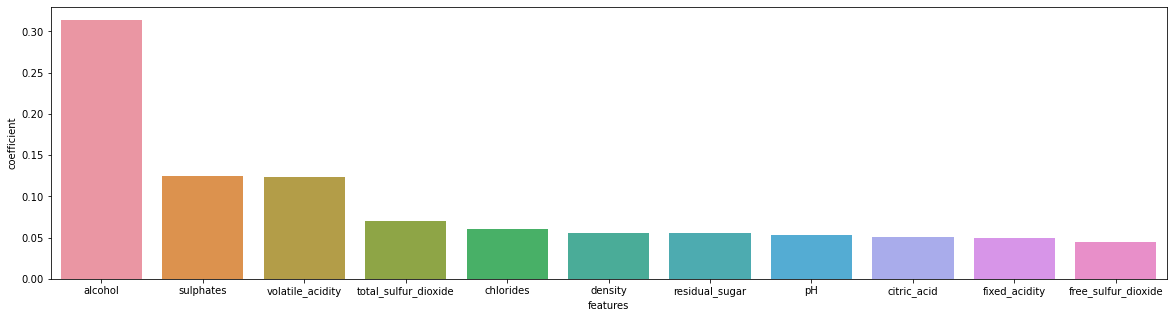

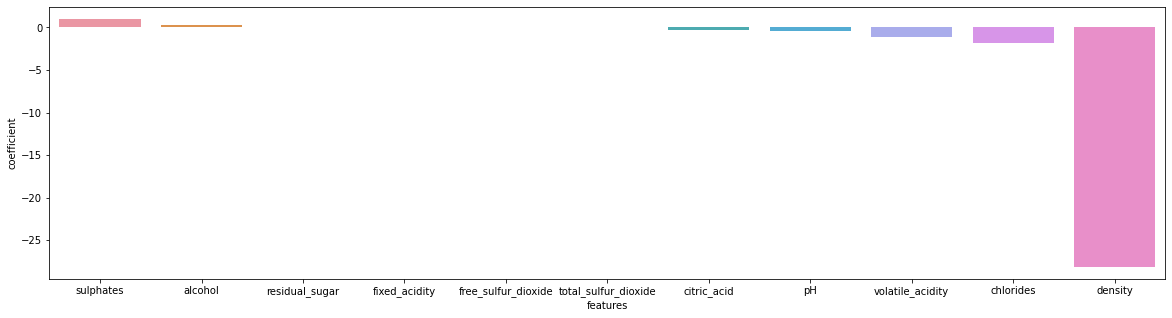

In [38]:
def plot_feature_importance(feat_imp):
    features = pd.DataFrame()
    features['features'] = X_train.columns
    features['coefficient'] = feat_imp
    features.sort_values(by=['coefficient'],ascending=False,inplace=True)
    fig,ax= plt.subplots()
    fig.set_size_inches(20,5)
    sn.barplot(data=features,x="features",y="coefficient",ax=ax)

rf_feat_imp = rModels['RF'].feature_importances_
lr_feat_imp = rModels['LR'].coef_
    
plot_feature_importance(rf_feat_imp)
plot_feature_importance(lr_feat_imp)

Here, the result from RandomForest model shows that 'Alcohol', 'Sulphates' and 'Volatile_acidity' are the top 3 features with the highest importance. 

Linear Regression result shows that density is the most important feature. 

##### Evaluate the best regression model on test set

In [39]:
compute_metrics('Random Forest regression model', rModels['RF'], X_test, y_test)

Random Forest regression model -- MAE: 0.4113892, RMSE: 0.5470701, RSquare: 0.495201


#### Classification model

##### Plot training loss and validation loss

In [40]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


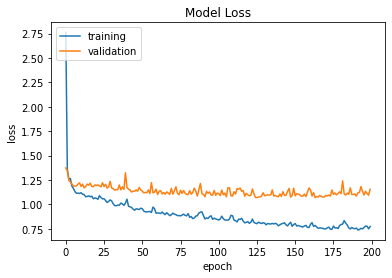

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

loss decreases as epoch increases, with diminishing effect around 150.

##### Plot training accuracy and validation accuracy

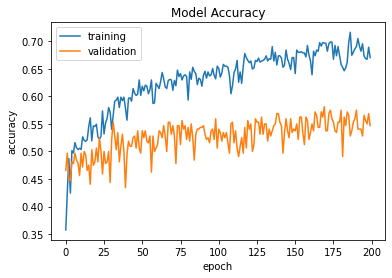

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

Model accuracy improves as epoch increases, stabilizes around 175. 

##### Evaluate the classsification model using Precision, Recall and Accuracy metrics

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def evaluate_model(name, model, features, labels):
    labels = np.argmax(labels, axis=1)
    pred = np.argmax(model.predict(features), axis=1)
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='micro'), 3)
    recall = round(recall_score(labels, pred, average='micro'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {}'.format(name,
                                                                    accuracy,
                                                                    precision,
                                                                    recall))

In [44]:
evaluate_model('Neural Network', model, X_val_np, y_val_np)

Neural Network -- Accuracy: 0.547 / Precision: 0.547 / Recall: 0.547


In [45]:
evaluate_model('Neural Network', model, X_test_np, y_test_np)

Neural Network -- Accuracy: 0.553 / Precision: 0.553 / Recall: 0.553


Results from both validation set and test set are not that strong. 

### Conclusion

*TODO*

1. Within regression models, RF performs better than LR in terms of accuracy and MAE, RMSE, RSquare.
2. Classification model (neural network model) performs better than Regression models based on the accuracy result. 
3. Feature importance analysis reveals that there are some features that offer significantly higher prediction power than the rest. RF model clearly shows the 'alcohol' is the most important feature, with 'sulphates' and 'volatile acidity' trailing behind. 
4. For the neural network model, increasing the number of epoch helps improve accuracy and reduce error, but the benefit diminishes after it reaches around 150.
5. The project indicates there is a possibility to predict wine quality based on the concentration of a few chemicals (thus by physiochemical tests). Some features like 'alcohol' 'sulphates' and 'volatile acidity' do provide significant predicting power on the quality of Vinho Verdes red wine. 